# Apprentisage par renforcement
## DQN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import gym
from torch.autograd import Variable
import random
from collections import namedtuple
from my_model import myAgent

In [2]:
class DQN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        q = self.fc3(x)
        return q

In [3]:
def soft_update(target, source, tau):
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(
            target_param.data * (1.0 - tau) + param.data * tau
)
        
def hard_update(target, source):
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(param.data)

In [4]:
class Agent(object):
    def __init__(self, gamma=0.99, batch_size=128):
        self.target_Q = DQN()
        self.Q = DQN()
        self.gamma = gamma
        self.batch_size = 128
        hard_update(self.target_Q, self.Q)
        self.optimizer = torch.optim.Adam(self.Q.parameters(), lr=0.001)
    
    def act(self, x, epsilon=0.1):
        # TODO
        # fonction utiles: torch.max()
        pass
    
    def backward(self, transitions):
        batch = Transition(*zip(*transitions))
        # TODO
        # fonctions utiles: torch.gather(), torch.detach()
        # torch.nn.functional.smooth_l1_loss()
        pass
        

In [5]:

Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward', 'done'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


In [6]:
env = gym.make('CartPole-v0')
agent = myAgent()
memory = ReplayMemory(100000)
batch_size = 128

epsilon = 1
rewards = []

for i in range(5000):
    obs = env.reset()
    done = False
    total_reward = 0
    epsilon *= 0.99
    while not done:
        epsilon = max(epsilon, 0.1)
        obs_input = Variable(torch.from_numpy(obs).type(torch.FloatTensor))
        action = agent.act(obs_input, epsilon)
        next_obs, reward, done, _ = env.step(action.data.numpy()[0])
        memory.push(obs_input.data.view(1,-1), action.data, 
                    torch.from_numpy(next_obs).type(torch.FloatTensor).view(1,-1), torch.Tensor([reward]),
                   torch.Tensor([done]))
        obs = next_obs
        total_reward += reward
    rewards.append(total_reward)
    if memory.__len__() > 10000:
        batch = memory.sample(batch_size)
        agent.backward(batch)

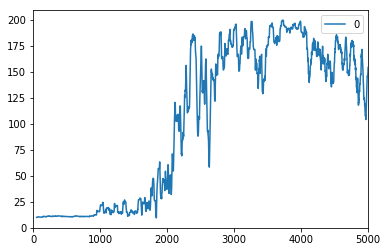

In [11]:
pd.DataFrame(rewards).rolling(50, center=False).mean().plot()